# Computational Intelligence CIS6005

# Multi-Layer Perceptron on Iris Dataset

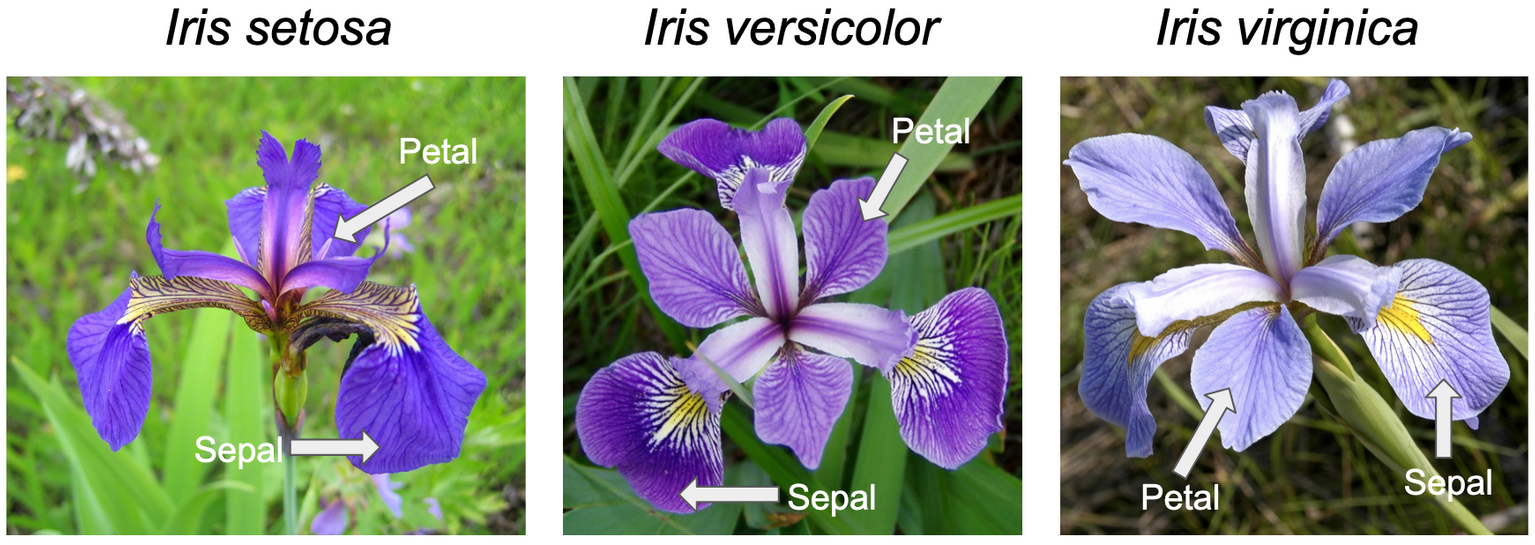
<h6>image source: Young cui</h6>

## Load the Dataset from Sklearn

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# These are the 4 columns in the dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### In this data set, we have three (3) classes for the output. However, recall that we created our multi-layer perceptron to predict two classes. So we can either modify it to predict more classes or we can simply just reduce this number of variables in the dataset to fit the context.  

* In this case, we will just modify the dataset

#### Defining the Inputs and Outputs

In [11]:
# The dataset has 50 values for each class. So we will just take the first 100 points

inputs = iris.data[0:100]

In [12]:
len(inputs)

100

In [13]:
inputs.shape

(100, 4)

In [15]:
outputs = iris.target[0:100]
outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
len(outputs)

100

In [17]:
outputs.shape

(100,)

#### We need to convert from vector to matrix

In [19]:
outputs = outputs.reshape(-1, 1)
outputs.shape

(100, 1)

# Complete neural network

In [23]:
#importing our Numpy library
import numpy as np

#creating the function for our sigmoid which accepts a parameter
def sigmoid(sum):
  return 1 / (1 + np.exp(-sum))

#creating the sigmoid derivarive
def sigmoid_derivative(sigmoid):
  return sigmoid * (1 - sigmoid)

#Initializing our weights with random values
#we have 4 input pararemeters for the input: sepal length(cm),sepal width(cm),petal length(cm),'petal width(cm)
# Hence >>> np.random.random((4, 5))  The 5 represents the number of neuron in the hidden layer
# np.random.random((5,1)) >> 5 means we have 5 inputs from the hidden to output later and 1 is the we have 1 neuron
weights_0 = 2 * np.random.random((4, 5)) - 1
weights_1 = 2 * np.random.random((5,1)) - 1

In [26]:
epochs = 3000
learning_rate = 0.01

error = []

for epoch in range(epochs):
    
    input_layer = inputs
    sum_synapse0 = np.dot(input_layer, weights_0)
    hidden_layer = sigmoid(sum_synapse0)

    sum_synapse1 = np.dot(hidden_layer, weights_1)
    output_layer = sigmoid(sum_synapse1)

    error_output_layer = outputs - output_layer
    average = np.mean(abs(error_output_layer))

    if epoch % 1000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)

    derivative_output = sigmoid_derivative(output_layer)
    delta_output = error_output_layer * derivative_output

    weights1T = weights_1.T
    delta_output_weight = delta_output.dot(weights1T)
    delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)

    hidden_layerT = hidden_layer.T
    input_x_delta1 = hidden_layerT.dot(delta_output)
    weights_1 = weights_1 + (input_x_delta1 * learning_rate)

    input_layerT = input_layer.T
    input_x_delta0 = input_layerT.dot(delta_hidden_layer)
    weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: 0.5006956905871345
Epoch: 1001 Error: 0.030518956522713477
Epoch: 2001 Error: 0.0206685717516059


In [27]:
import matplotlib.pyplot as plt


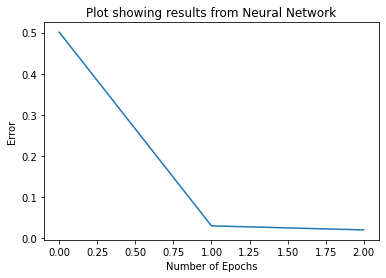

In [28]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network')
plt.plot(error)
plt.show()

In [32]:
def calculate_output(instance):
    hidden_layer = sigmoid(np.dot(instance, weights_0))
    output_layer = sigmoid(np.dot(hidden_layer, weights_1))
    return output_layer[0]

In [39]:
# Checking the values of the first input(index 0) and its corresponding class

inputs[0], outputs[0]

(array([5.1, 3.5, 1.4, 0.2]), array([0]))

In [40]:
# Making a Prediction with our neural network on that input 0
round(calculate_output(inputs[0]))

0

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
iris.target_names[int(round(calculate_output(inputs[0])))]

'setosa'

In [37]:
inputs[70], outputs[70]

(array([5.9, 3.2, 4.8, 1.8]), array([1]))

In [38]:
iris.target_names[int(round(calculate_output(inputs[70])))]

'versicolor'